# MTR 2040 Lab 4
## Name: your name here
## Date: insert date here

The main purpose of this lab is to continue exploration of the **pandas** library and do some more advanced indexing, number crunching, and plotting.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* time manipulation
* indexing with "and" "or"
* subsetting dataframes
* Scatter plots
* Double Y-axis

We've already learned how to use an if statement to check to conditon of something, but what if there are mulitple conditions? We can use the `&` and `|` operators. `&` refers to "and" while `|` refers to "or". Let's make some random temperature values (this time we'll use a [numpy function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to make the values for us instead of assigning them manually like we have in the past.

In [12]:
# make 100 random interger values between 10 and 80 
daily_temperatures = np.random.randint(low=10, high=80, size=100)
daily_temperatures

array([10, 23, 47, 36, 57, 43, 29, 76, 38, 71, 32, 33, 43, 22, 24, 14, 54,
       29, 51, 44, 39, 24, 49, 47, 74, 53, 49, 22, 68, 46, 28, 14, 31, 36,
       63, 34, 69, 72, 15, 37, 77, 32, 52, 50, 61, 64, 66, 53, 42, 73, 12,
       17, 60, 20, 14, 45, 73, 19, 47, 26, 11, 23, 37, 65, 30, 55, 60, 17,
       66, 53, 27, 33, 42, 29, 16, 54, 66, 62, 11, 49, 20, 70, 67, 34, 17,
       10, 22, 28, 54, 12, 37, 10, 72, 19, 17, 23, 12, 45, 11, 79])

Now that we have our values, what if we want to count all the values between 40 and 50 degrees? We could do each step one at a time like we know how to do...

In [22]:
temps = []
for t in daily_temperatures:
    if t >= 40:
        if t <= 50:
            temps.append(t)
print("There are", len(temps), "temperatures between 30 and 50 degrees")

There are 15 temperatures between 30 and 50 degrees


So this solution works, but we can make it simpler by including the "and" operator for a single if statement. Note that if you have more than one condition in an if statement you must put parentheses around each condition. 

In [26]:
temps = []
for t in daily_temperatures:
    if (t >= 40) & (t <= 50): # if temperature is above (or equal) to 40 and less than (or equal) to 50
        temps.append(t)
print(temps)
print("There are", len(temps), "temperatures between 30 and 50 degrees")

[47, 43, 43, 44, 49, 47, 49, 46, 50, 42, 45, 47, 42, 49, 45]
There are 15 temperatures between 30 and 50 degrees


Let's also revist **boolean** values. Booleans are "True" of "False", which are what is used to determine if a condition is met. Booleans in Python are also mathmatically represented as `1` for `True`, and `0` for `False`. This is useful, since we can sum up things that are true (and the falses will always sum to zero.

In [28]:
(daily_temperatures >= 40) & (daily_temperatures <= 50)

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

Behind the hood, this is how the conditions are evaluated - each index that is listed as True, is a value that met the set of condtions (>= 40 and <= 50). So, if we sum them up, we should have the total amount of values meeting the condition. Neat.

In [32]:
np.sum((daily_temperatures >= 40) & (daily_temperatures <= 50))

15

Let's try the "or" `|` operator.

In [44]:
for t in daily_temperatures:
    if (t < 12) | (t > 77): # if t is less than 12 OR greater than 77
        print(t)

10
11
11
10
10
11
79


## Subsetting Data in Pandas
Subsetting data in pandas is one of the most common things we do. You might want to subset / filter the data by time, by certain values, etc. Maybe you are only interested in the datapoints that are below freezing. We can filter the data using conditionals within the dataframe syntax.

In [48]:
# Load some data
met_data = pd.read_csv("~/Downloads/FC_Ag_5min_2023-12-01_2023-12-31.csv", parse_dates=["Date and Time"])
met_data.head()

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
0,fcl01,2022-12-01 00:00:00,15.19,0.874,12.12,0.0,0.0,1.22,287.5,3.11
1,fcl01,2022-12-01 00:05:00,15.13,0.871,11.99,0.0,0.0,0.15,302.6,0.96
2,fcl01,2022-12-01 00:10:00,15.01,0.870,11.84,0.0,0.0,1.47,160.8,3.33
3,fcl01,2022-12-01 00:15:00,15.33,0.873,12.24,0.0,0.0,4.82,95.8,6.40
4,fcl01,2022-12-01 00:20:00,16.02,0.867,12.75,0.0,0.0,2.42,33.8,5.83


We already know how to subset a particular column of data (or multiple columns).

In [50]:
# get single column
met_data["Air Temp"]

0       15.19
1       15.13
2       15.01
3       15.33
4       16.02
        ...  
8923    35.16
8924    35.22
8925    35.11
8926    34.92
8927    34.68
Name: Air Temp, Length: 8928, dtype: float64

In [53]:
# get multiple columns - note that you need a second set of brackets!
# the second set of brackets makes the columns a list
met_data[["Air Temp", "Dewpoint"]]

,Air Temp,Dewpoint
0,15.19,12.12
1,15.13,11.99
2,15.01,11.84
3,15.33,12.24
4,16.02,12.75
...,...,...
8923,35.16,28.37
8924,35.22,28.41
8925,35.11,28.67
8926,34.92,28.81


But what if we want to subset by **row** (sample)? We put a conditional inside the brackets. So let's say we want all the samples that have an air temperature less than 10 degrees, we would use the syntax

`met_data[met_data["Air Temp"] < 10]`

Think of this as the regular syntax to grab a column: `df[column_name]` but the "column name" is now a conditional that says grab all rows that have Air Temp < 10.

In [63]:
met_data[met_data["Air Temp"] < 10]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
4954,fcl01,2022-12-18 04:50:00,9.88,0.736,3.13,0.00,0.0,2.63,296.3,4.82
4955,fcl01,2022-12-18 04:55:00,9.79,0.739,3.13,0.00,0.0,2.36,332.0,3.59
4956,fcl01,2022-12-18 05:00:00,9.99,0.737,3.27,0.00,0.0,2.80,335.3,5.17
4957,fcl01,2022-12-18 05:05:00,9.90,0.733,3.05,0.00,0.0,2.53,337.8,4.95
4958,fcl01,2022-12-18 05:10:00,9.95,0.730,3.02,0.00,0.0,2.14,315.8,3.68
...,...,...,...,...,...,...,...,...,...,...
6714,fcl01,2022-12-24 07:30:00,8.04,0.753,1.84,10.21,0.0,0.40,214.2,1.75
6715,fcl01,2022-12-24 07:35:00,8.17,0.755,2.04,12.79,0.0,2.10,249.7,3.16
6716,fcl01,2022-12-24 07:40:00,8.28,0.752,2.04,16.99,0.0,2.53,240.8,3.24
6717,fcl01,2022-12-24 07:45:00,8.64,0.754,2.45,23.51,0.0,2.79,243.3,3.33


You can now see the Air Temps appear to be under 10 (we don't konw for sure since we can't see all the values), but the length is now 800 instead of 8000+, so that probably makes sense.

Let's subset even further, how many samples had temperatures below -20?

In [64]:
met_data[met_data["Air Temp"] < -20]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed


An empty dataframe is returned... which means there were no samples with "Air Temp" below -20!

An empty dataframe is returned... which means there were no samples with "Air Temp" below -20! Now, let's try adding a second condtion. Let's say we want all the samples with Air Temperature < 0, AND all dew_points below -10.

We can start by doing everything one at a time.

In [70]:
# Create a new df with all temps below zero
df_below_zero = met_data[met_data["Air Temp"] < 0]

# subset the below_zero df with the dewpoint conditional (< -20)
# notice we are now subsetting the NEW dataframe we just created 
df_below_zero[df_below_zero["Dewpoint"] < -20]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
6123,fcl01,2022-12-22 06:15:00,-14.37,0.743,-20.18,0.00,0.0,3.49,84.2,5.04
6124,fcl01,2022-12-22 06:20:00,-14.53,0.742,-20.35,0.00,0.0,3.47,88.8,4.78
6125,fcl01,2022-12-22 06:25:00,-14.78,0.740,-20.65,0.00,0.0,2.77,63.0,5.17
6126,fcl01,2022-12-22 06:30:00,-15.00,0.739,-20.88,0.00,0.0,2.55,73.4,4.65
6127,fcl01,2022-12-22 06:35:00,-15.07,0.741,-20.92,0.00,0.0,3.03,68.4,4.17
6128,fcl01,2022-12-22 06:40:00,-15.12,0.742,-20.93,0.00,0.0,2.32,91.6,3.95
6129,fcl01,2022-12-22 06:45:00,-15.32,0.740,-21.17,0.00,0.0,1.59,85.2,4.43
6130,fcl01,2022-12-22 06:50:00,-15.02,0.743,-20.79,0.00,0.0,2.81,79.3,4.17
6131,fcl01,2022-12-22 06:55:00,-15.03,0.744,-20.78,0.00,0.0,2.15,61.6,3.02
6132,fcl01,2022-12-22 07:00:00,-15.21,0.744,-20.97,0.00,0.0,0.21,30.4,1.36


Looks correct! Now lets do it at the same time like we learned at the beginning.

In [71]:
# remember the parentheses around the two seperate conditions!
new_df = met_data[(met_data["Air Temp"] < 0) & (met_data["Dewpoint"] < -20)]
new_df

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
6123,fcl01,2022-12-22 06:15:00,-14.37,0.743,-20.18,0.00,0.0,3.49,84.2,5.04
6124,fcl01,2022-12-22 06:20:00,-14.53,0.742,-20.35,0.00,0.0,3.47,88.8,4.78
6125,fcl01,2022-12-22 06:25:00,-14.78,0.740,-20.65,0.00,0.0,2.77,63.0,5.17
6126,fcl01,2022-12-22 06:30:00,-15.00,0.739,-20.88,0.00,0.0,2.55,73.4,4.65
6127,fcl01,2022-12-22 06:35:00,-15.07,0.741,-20.92,0.00,0.0,3.03,68.4,4.17
6128,fcl01,2022-12-22 06:40:00,-15.12,0.742,-20.93,0.00,0.0,2.32,91.6,3.95
6129,fcl01,2022-12-22 06:45:00,-15.32,0.740,-21.17,0.00,0.0,1.59,85.2,4.43
6130,fcl01,2022-12-22 06:50:00,-15.02,0.743,-20.79,0.00,0.0,2.81,79.3,4.17
6131,fcl01,2022-12-22 06:55:00,-15.03,0.744,-20.78,0.00,0.0,2.15,61.6,3.02
6132,fcl01,2022-12-22 07:00:00,-15.21,0.744,-20.97,0.00,0.0,0.21,30.4,1.36


## Dealing with Datetime objects in Pandas

Datetimes are very important in Meteorlogical data and is definitely something we often find ourselves subsetting with it. Luckily, Pandas has lots of builtin methods to deal with datetimes.

First we can see that we have a "Date and Time" column included in our data with the format "YYYY-MM-DD HH:mm:ss" (year-month-day hour:minute:second)

We can use the `.dt` method to retrive the part of the datetime object we are intersted in. `.dt.hour` fore example.

In [77]:
met_data.head()

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
0,fcl01,2022-12-01 00:00:00,15.19,0.874,12.12,0.0,0.0,1.22,287.5,3.11
1,fcl01,2022-12-01 00:05:00,15.13,0.871,11.99,0.0,0.0,0.15,302.6,0.96
2,fcl01,2022-12-01 00:10:00,15.01,0.870,11.84,0.0,0.0,1.47,160.8,3.33
3,fcl01,2022-12-01 00:15:00,15.33,0.873,12.24,0.0,0.0,4.82,95.8,6.40
4,fcl01,2022-12-01 00:20:00,16.02,0.867,12.75,0.0,0.0,2.42,33.8,5.83


In [82]:
# get the year
met_data["Date and Time"].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
8923    2022
8924    2022
8925    2022
8926    2022
8927    2022
Name: Date and Time, Length: 8928, dtype: int64

In [83]:
# get the minute
met_data["Date and Time"].dt.minute

0        0
1        5
2       10
3       15
4       20
        ..
8923    35
8924    40
8925    45
8926    50
8927    55
Name: Date and Time, Length: 8928, dtype: int64

Let's try subsetting our data using the `.dt` method.

In [84]:
# get all the data on the top of the hour
met_data[met_data["Date and Time"].dt.minute == 0]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
0,fcl01,2022-12-01 00:00:00,15.19,0.874,12.12,0.0,0.0,1.22,287.5,3.11
12,fcl01,2022-12-01 01:00:00,14.09,0.869,10.91,0.0,0.0,1.91,0.1,3.55
24,fcl01,2022-12-01 02:00:00,12.51,0.878,9.58,0.0,0.0,0.57,280.6,2.50
36,fcl01,2022-12-01 03:00:00,15.04,0.864,11.72,0.0,0.0,1.96,232.5,4.30
48,fcl01,2022-12-01 04:00:00,14.25,0.870,11.09,0.0,0.0,1.65,299.9,4.47
...,...,...,...,...,...,...,...,...,...,...
8868,fcl01,2022-12-31 19:00:00,40.05,0.596,27.12,0.0,0.0,5.86,169.3,9.29
8880,fcl01,2022-12-31 20:00:00,37.67,0.651,26.99,0.0,0.0,1.64,207.3,3.55
8892,fcl01,2022-12-31 21:00:00,37.05,0.687,27.71,0.0,0.0,1.99,33.1,3.64
8904,fcl01,2022-12-31 22:00:00,35.63,0.743,28.25,0.0,0.0,0.03,245.5,0.96


In [85]:
# get all the data for the moonth of July
met_data[met_data["Date and Time"].dt.month == 7]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed


Looks like we don't have any data for July!! (we only have data for December)

We can also use the full date STRING to subset the data.

In [90]:
# Retrieve data for December 17, 2022 at Noon
met_data[met_data["Date and Time"] == "2022-12-17 12:00:00"]

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
4752,fcl01,2022-12-17 12:00:00,33.64,0.208,-2.35,472.0,0.0,7.21,170.4,10.57


## Putting it all together 

Let do some subsetting and plotting.

Let's go ahead and plot the air temp (as a line plot) for December 17th through December 20th.

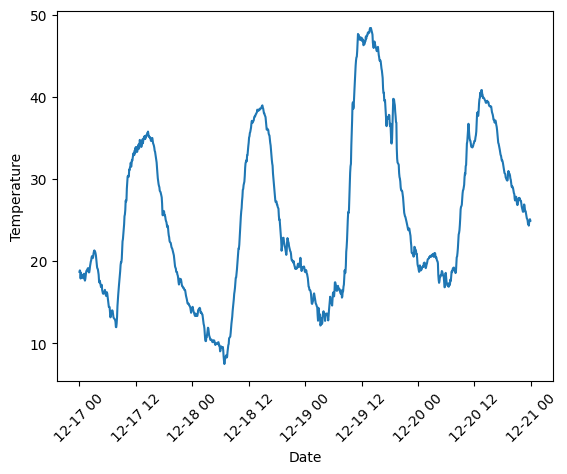

In [121]:
# you can use  backslash "\" to continue code another line, but is only interpreted as a single line
data_subset = met_data[(met_data["Date and Time"].dt.day >= 17) & \
                       (met_data["Date and Time"].dt.day <= 20)]

plt.plot(data_subset['Date and Time'], data_subset["Air Temp"])
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel('Temperature')
plt.show()

Remember, there are many, many ways to accomplish the same thing in programming. Take your time and look at these and convice yourself they all provide the same result.

In [129]:
data_subset = met_data[(met_data["Date and Time"].dt.day >= 17) & \
                       (met_data["Date and Time"].dt.day <= 20)]

data_subset1 = met_data[(met_data["Date and Time"] >= "2022-12-17 00:00:00") & \
                       (met_data["Date and Time"] <= "2022-12-20 23:55:00")]

start_date = "2022-12-17 00:00:00"
end_date = "2022-12-20 23:55:00"
data_subset2 = met_data[(met_data["Date and Time"] >= start_date) & \
                       (met_data["Date and Time"] <= end_date)]

data_subset2

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed
4608,fcl01,2022-12-17 00:00:00,18.69,0.406,-1.36,0.0,0.0,1.59,9.5,3.64
4609,fcl01,2022-12-17 00:05:00,18.87,0.404,-1.30,0.0,0.0,2.16,330.3,3.99
4610,fcl01,2022-12-17 00:10:00,18.76,0.409,-1.12,0.0,0.0,1.89,228.2,3.86
4611,fcl01,2022-12-17 00:15:00,17.88,0.434,-0.66,0.0,0.0,2.94,65.5,4.78
4612,fcl01,2022-12-17 00:20:00,18.53,0.423,-0.64,0.0,0.0,2.33,267.8,3.77
...,...,...,...,...,...,...,...,...,...,...
5755,fcl01,2022-12-20 23:35:00,24.32,0.666,14.81,0.0,0.0,3.22,210.3,5.87
5756,fcl01,2022-12-20 23:40:00,24.74,0.690,16.02,0.0,0.0,3.81,214.2,6.01
5757,fcl01,2022-12-20 23:45:00,25.00,0.689,16.23,0.0,0.0,1.23,155.9,2.81
5758,fcl01,2022-12-20 23:50:00,25.10,0.687,16.26,0.0,0.0,2.51,188.6,5.61


## Some More plotting examples

How to plot a scatterplot ....

Text(0, 0.5, 'Gust Speed')

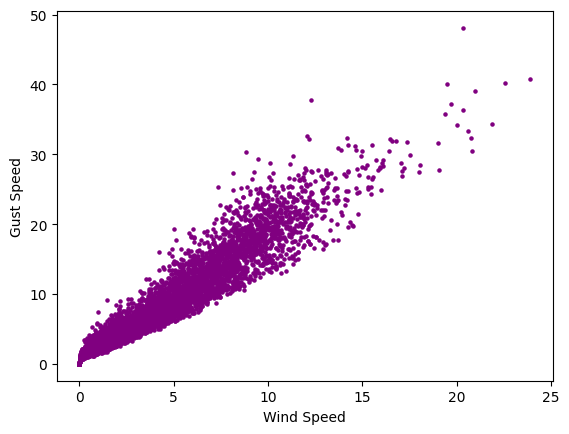

In [145]:
plt.scatter(met_data["Wind"], met_data["Gust Speed"], 5, color='purple')
plt.xlabel("Wind Speed")
plt.ylabel("Gust Speed")

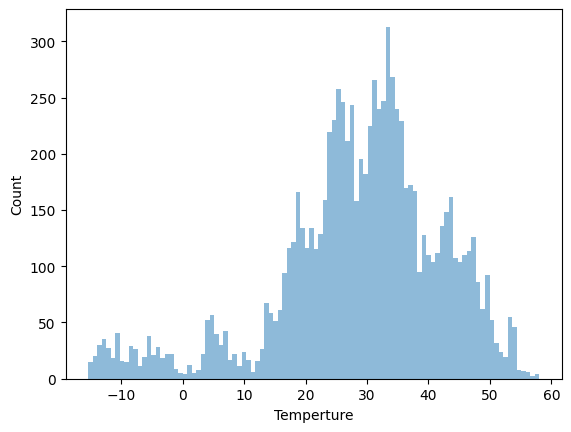

In [152]:
# Plot a histogram ....
plt.hist(met_data["Air Temp"], bins=100, alpha=0.5)
plt.xlabel("Temperture")
plt.ylabel("Count")
plt.show()

# Excersises

Let's get some even more intersting data! This data will have three different stations representing three different locations of instruments (column name `Station` - Fort Collins, Durango, and Kremmling) and have a full years' worth of hourly data. You can use `df['Station'].unique()` to find the names of all the Stations in the dataset.

In [101]:
df = pd.read_csv('~/Downloads/lab_4_data.csv', parse_dates=['Date and Time'])
df

,Station,Date and Time,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Gust Speed
0,drg01,2022-01-01 00:00:00,30.75,1.000,30.75,0.0,0.0,2.71,9.27
1,drg01,2022-01-01 01:00:00,29.87,1.000,29.87,0.0,0.0,5.50,8.59
2,drg01,2022-01-01 02:00:00,30.81,0.939,29.26,0.0,0.0,3.85,7.39
3,drg01,2022-01-01 03:00:00,30.53,0.910,28.22,0.0,0.0,2.91,7.72
4,drg01,2022-01-01 04:00:00,30.12,0.894,27.38,0.0,0.0,4.65,8.50
...,...,...,...,...,...,...,...,...,...
26275,krm01,2022-12-31 19:00:00,28.99,0.998,28.94,0.0,0.0,8.42,11.88
26276,krm01,2022-12-31 20:00:00,28.50,0.997,28.43,0.0,0.0,4.05,8.97
26277,krm01,2022-12-31 21:00:00,28.48,0.997,28.41,0.0,0.0,1.61,5.72
26278,krm01,2022-12-31 22:00:00,28.79,0.997,28.72,0.0,0.0,2.07,5.42


1. Debug the following lines of code:

In [145]:
# This cell does not produce an error, but it is incorrect - find the bug. 
# (it does not have to do with the first two lines)

np.random.seed(1)                             # set seed so you get the same random values each time
random_values = np.random.randint(0, 100, 50) # get 50 random values between 0 and 100

for value in random_values:
    if value <= 5 | value >= 95:   # try to print outliers (all values <= 5 OR values >= 95)
        print(value)

94
96


In [124]:
# Grab all the data from the Kremmling Station
df[df['Station'] == krm01]

NameError: name 'krm01' is not defined

In [150]:
# get the month of the date time and make it it's own new column
df['month'] = df['date and time'].month

KeyError: 'date and time'

In [151]:
# Get all the data that has Dewpoint > 60 AND RH == 1

df[df['Dewpoint'] > 60 & df['RH'] = 1]

SyntaxError: invalid syntax (3274276675.py, line 3)

2. Subset the data to only the summer months (June / July / August) and save it as it's own variable named `summer_met_data`

In [142]:
# Your code here


3. What was the average temperature for each Station for the whole year?

In [140]:
# Your code here


4. Use the `np.cumsum()` (cummulative sum) function to plot the total cummulative **precipitation** for **each Station** on the same plot (Date / time on the x-axis). Make sure to label your graph accordingly. You will likely need to subset each Station first...

In [148]:
# Your code here


5. Plot something interesting!

In [149]:
# your code here
